In [1]:

import pickle
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

In [2]:
with open("C:/Users/shank/Downloads/8Projects/5/Project 5/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("C:/Users/shank/Downloads/8Projects/5/Project 5/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("C:/Users/shank/Downloads/8Projects/5/Project 5/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

36

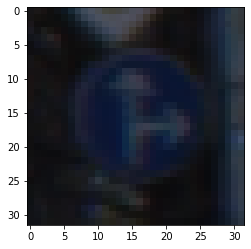

In [6]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

In [11]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

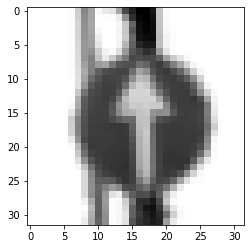

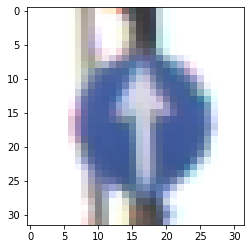

In [16]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [18]:
image_shape = X_train_gray[i].shape

In [19]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [20]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\Users\shank\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 111s 106ms/step - loss: 3.4889 - accuracy: 0.1064 - val_loss: 2.5681 - val_accuracy: 0.2995
Epoch 2/50
70/70 [==============================] - 6s 86ms/step - loss: 1.9239 - accuracy: 0.4781 - val_loss: 1.3294 - val_accuracy: 0.5993
Epoch 3/50
70/70 [==============================] - 7s 98ms/step - loss: 1.0047 - accuracy: 0.7140 - val_loss: 0.9347 - val_accuracy: 0.7231
Epoch 4/50
70/70 [==============================] - 7s 98ms/step - loss: 0.6849 - accuracy: 0.8118 - val_loss: 0.7941 - val_accuracy: 0.7590
Epoch 5/50
70/70 [==============================] - 6s 92ms/step - loss: 0.5322 - accuracy: 0.8590 - val_loss: 0.7131 - val_accuracy: 0.7805
Epoch 6/50
70/70 [==============================] - 7s 98ms/step - loss: 0.4372 - accuracy: 0.8833 - val_loss: 0.6482 - val_accuracy: 0.8050
Epoch 7/50
70/70 [==============================] - 7s 103ms/step - loss: 0.3697 - accuracy: 0.9045 - val_loss: 0.6207 - val_accuracy: 0.8138
Epoch 8/5

In [18]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Accuracy : 0.8658


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

<AxesSubplot:>

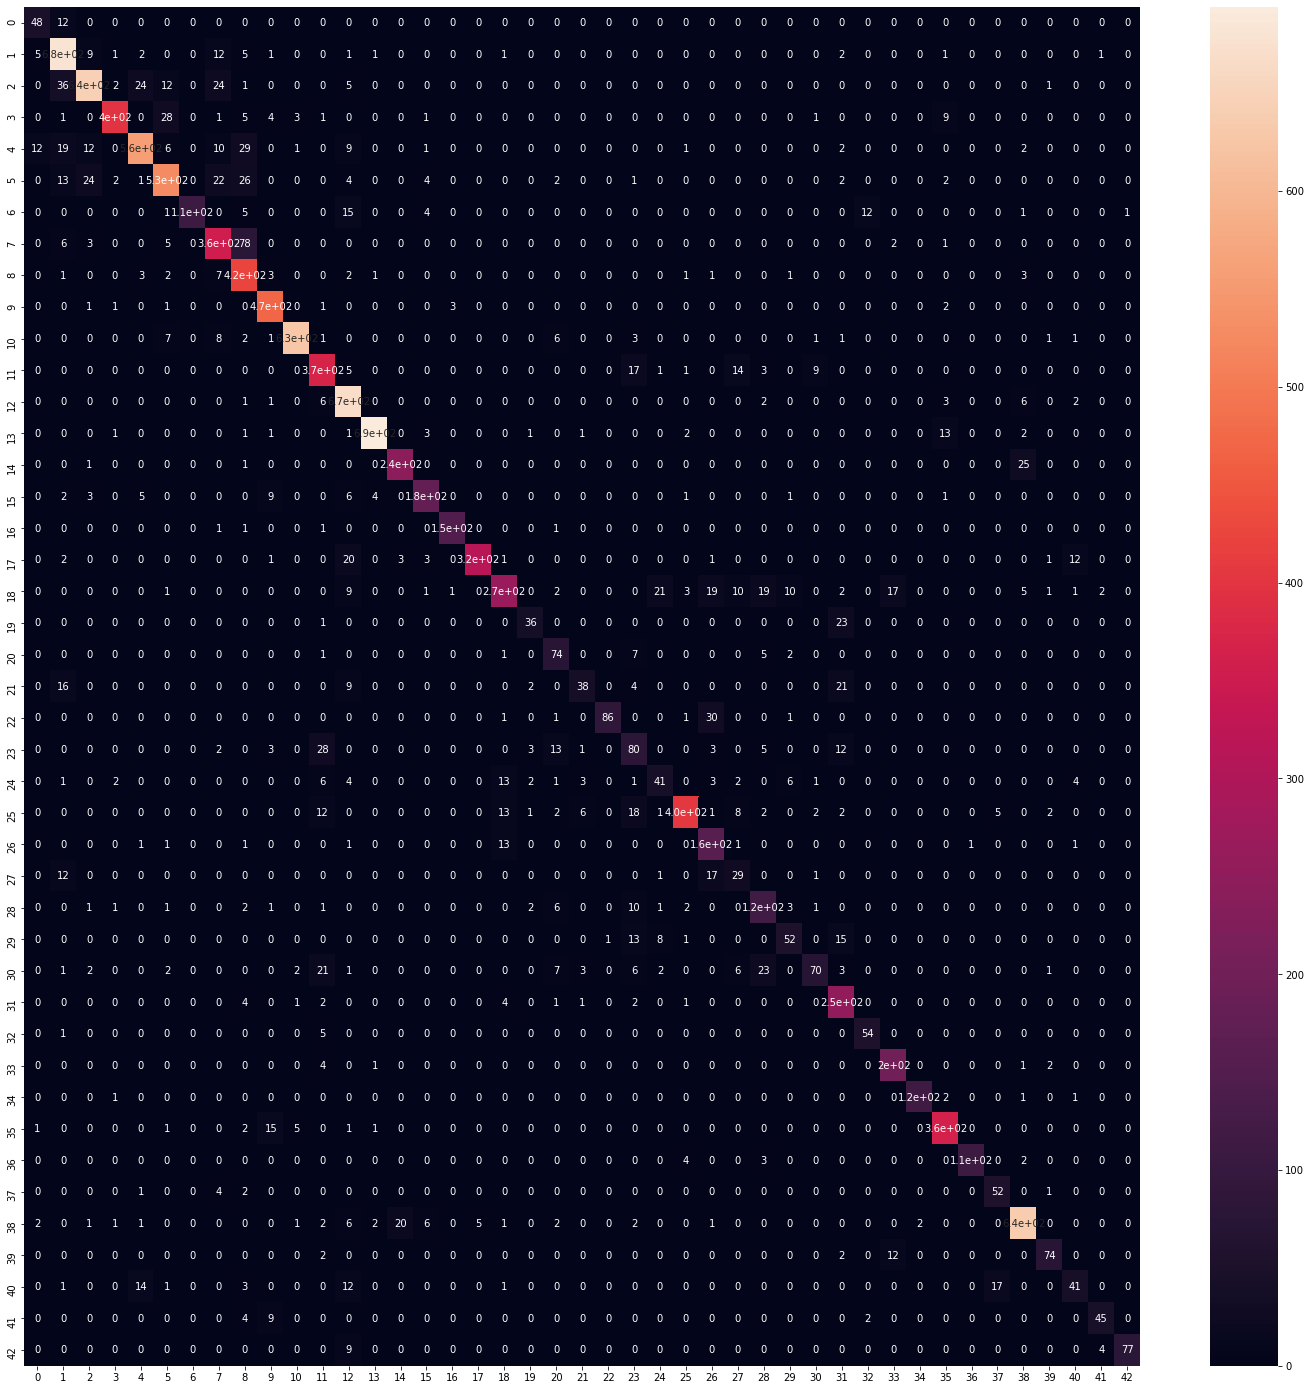

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

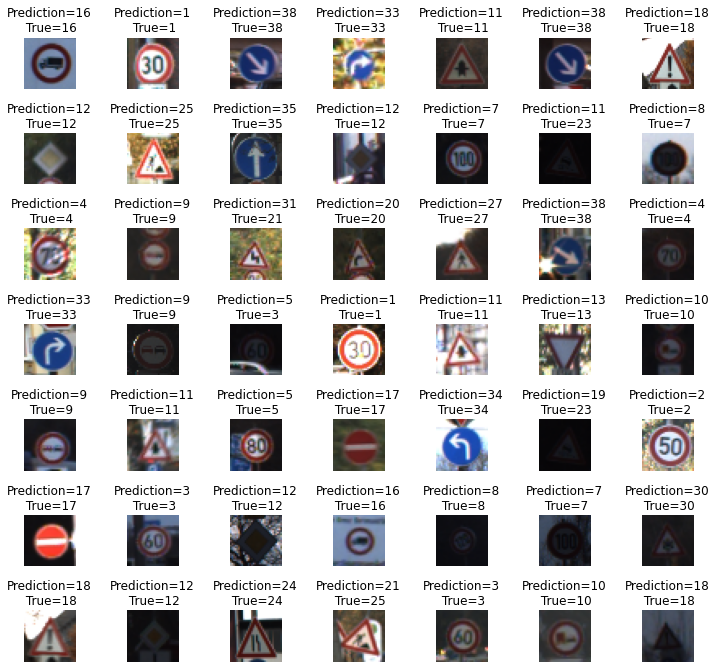

In [24]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)